## Load Data

In [1]:
# Load the Excel file data in sheet number 2 using pandas
import pandas as pd
pd.set_option("display.max_columns", None)

# Load the Excel file data in sheet number 2 using pandas, use the first row as the column names
df = pd.read_excel("Case Study for Data Scientist.xlsx", sheet_name="Sheet1", header=0)
df.head()

,Day,Date,Region,Mill Code,Mill Type,Actual OER %,Crop Freshness Score,Ripe %,Long Stalk %,Rat Damage %,Loose Fruits %,Rainfall (mm),Age Profile (years),Total Oil Losses %,Downtime %,FFB Processed (MT),Seed A %,Seed B %,Other Seeds %,Coastal %,Inland %
0,Wed,2020-01-01,R01,Z001,IP,0.00,300.000000,95.157670,1.241942,4.734563,6.833731,0.000000,15.721261,0.000000,0.000000,0.000,31.114312,0.0,68.885688,49.290868,50.709132
1,Thu,2020-01-02,R01,Z001,IP,22.27,289.458286,95.430159,1.859710,3.931418,7.475889,3.342912,13.950932,1.387521,0.254744,648.373,39.927122,0.0,60.072878,46.188086,53.811914
2,Fri,2020-01-03,R01,Z001,IP,22.55,262.890977,94.617481,1.514098,3.568296,7.416632,24.355107,13.322048,1.484348,0.058243,530.021,37.392953,0.0,62.607047,45.361864,54.638136
3,Sat,2020-01-04,R01,Z001,IP,22.12,262.653835,95.404031,1.457055,4.809152,7.225248,1.208765,14.120394,1.364690,0.099324,702.527,33.681927,0.0,66.318073,51.698756,48.301244
4,Sun,2020-01-05,R01,Z001,IP,0.00,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000,NaN,NaN,NaN,NaN,NaN


In [2]:
print(df.columns)
print(len(df.columns))
print(df.dtypes)

Index(['Day', 'Date', 'Region', 'Mill Code', 'Mill Type', 'Actual OER %',
       'Crop Freshness Score', 'Ripe %', 'Long Stalk %', 'Rat Damage %',
       'Loose Fruits %', 'Rainfall (mm)', 'Age Profile (years)',
       'Total Oil Losses %', 'Downtime %', 'FFB Processed (MT)', 'Seed A %',
       'Seed B %', 'Other Seeds %', 'Coastal %', 'Inland %'],
      dtype='object')
21
Day                             object
Date                    datetime64[ns]
Region                          object
Mill Code                       object
Mill Type                       object
Actual OER %                   float64
Crop Freshness Score           float64
Ripe %                         float64
Long Stalk %                   float64
Rat Damage %                   float64
Loose Fruits %                 float64
Rainfall (mm)                  float64
Age Profile (years)            float64
Total Oil Losses %             float64
Downtime %                     float64
FFB Processed (MT)             float64


Day                      0.000000
Date                     0.000000
Region                   0.000000
Mill Code                0.000000
Mill Type                0.000000
Actual OER %             0.054856
Crop Freshness Score    17.178652
Ripe %                  17.178652
Long Stalk %            17.178652
Rat Damage %            17.178652
Loose Fruits %           3.125000
Rainfall (mm)           17.178652
Age Profile (years)     16.895527
Total Oil Losses %       0.000000
Downtime %               0.081399
FFB Processed (MT)       0.054856
Seed A %                16.534541
Seed B %                16.534541
Other Seeds %           16.534541
Coastal %               16.534541
Inland %                16.534541
dtype: float64


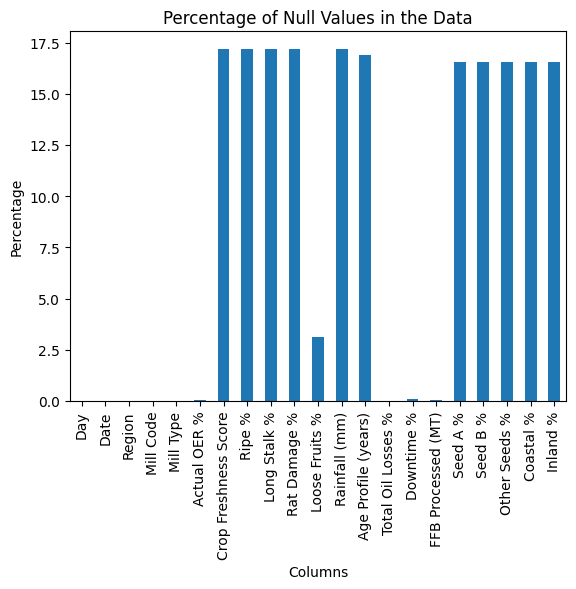

Day                        0
Date                       0
Region                     0
Mill Code                  0
Mill Type                  0
Actual OER %              31
Crop Freshness Score    9708
Ripe %                  9708
Long Stalk %            9708
Rat Damage %            9708
Loose Fruits %          1766
Rainfall (mm)           9708
Age Profile (years)     9548
Total Oil Losses %         0
Downtime %                46
FFB Processed (MT)        31
Seed A %                9344
Seed B %                9344
Other Seeds %           9344
Coastal %               9344
Inland %                9344
dtype: int64


In [3]:

# Calculate the percentage of null values in the data
null_values = df.isnull().sum()
total_values = df.isnull().count()
percentage_null_values = (null_values/total_values) * 100
print(percentage_null_values)

# Plot the percentage null values in the data using a bar chart
import matplotlib.pyplot as plt
percentage_null_values.plot(kind="bar")
plt.title("Percentage of Null Values in the Data")
plt.xlabel("Columns")
plt.ylabel("Percentage")
plt.show()
# Check the null values in the data
print(df.isnull().sum())

In [4]:
# Remove the null values from the data
# df = df.dropna()
# print(df.isnull().sum())

In [5]:
categorical_features = df.select_dtypes(include=['object']).columns
print(categorical_features)
print(len(categorical_features))

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
numerical_features = numerical_features.drop('Actual OER %')
print(numerical_features)
print(len(numerical_features))

label = 'Actual OER %'


Index(['Day', 'Region', 'Mill Code', 'Mill Type'], dtype='object')
4
Index(['Crop Freshness Score', 'Ripe %', 'Long Stalk %', 'Rat Damage %',
       'Loose Fruits %', 'Rainfall (mm)', 'Age Profile (years)',
       'Total Oil Losses %', 'Downtime %', 'FFB Processed (MT)', 'Seed A %',
       'Seed B %', 'Other Seeds %', 'Coastal %', 'Inland %'],
      dtype='object')
15


## Numerical Features Analysis

### Correlation between numerical features and target

In [6]:
# Plot the scatter plot between the numerical features and the label
df2 = df.copy()
df2 = df2.dropna()

# Remove rows where the OER% is 0
df2 = df2[df2['Actual OER %'] != 0]
df2 = df2.dropna()

zo22 = df2[df2['Mill Code'] == 'Z022']
zo17 = df2[df2['Mill Code'] == 'Z017']
zo13 = df2[df2['Mill Code'] == 'Z013']
zo25 = df2[df2['Mill Code'] == 'Z025']

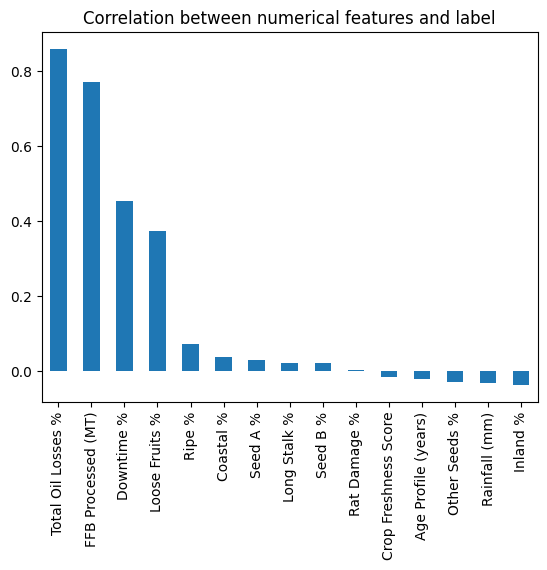

Total Oil Losses %      0.858353
FFB Processed (MT)      0.769628
Downtime %              0.451815
Loose Fruits %          0.373002
Ripe %                  0.070787
Coastal %               0.037449
Seed A %                0.029037
Long Stalk %            0.019664
Seed B %                0.019379
Rat Damage %            0.002018
Crop Freshness Score   -0.017229
Age Profile (years)    -0.023058
Other Seeds %          -0.031167
Rainfall (mm)          -0.033956
Inland %               -0.037609
dtype: float64


In [7]:
# perform correlation between numerical Features and Label
correlation = df[numerical_features].corrwith(df[label]).sort_values(ascending=False)

# plot a bar chart to show the correlation
import matplotlib.pyplot as plt
correlation.plot(kind='bar')
plt.title("Correlation between numerical features and label")
plt.show()


print(correlation)


In [8]:
# using plotly plot the line chart of Actual OER % for Z022
import plotly.express as px
import matplotlib.pyplot as plt

def plot_charts(df):
    fig = px.line(df, x='Date', y='Actual OER %', title='Actual OER % for Z022')
    fig.show()
    df.head()

    # perform correlation between numerical Features and Label
    correlation = df[numerical_features].corrwith(df[label]).sort_values(ascending=False)
    correlation.plot(kind='bar')
    plt.title("Correlation between numerical features and label")
    plt.show()

    print(correlation)

    # loop through the numerical features and plot the scatter plot with the label
    for feature in numerical_features:
        plt.scatter(df[feature], df[label])
        plt.xlabel(feature)
        plt.ylabel(label)
        plt.title(f"{feature} vs {label}")
        plt.show()

/Users/amirashrafizham/Desktop/PythonApps/interviews/simedarbyguthrie/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning:

invalid value encountered in divide

/Users/amirashrafizham/Desktop/PythonApps/interviews/simedarbyguthrie/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning:

invalid value encountered in divide



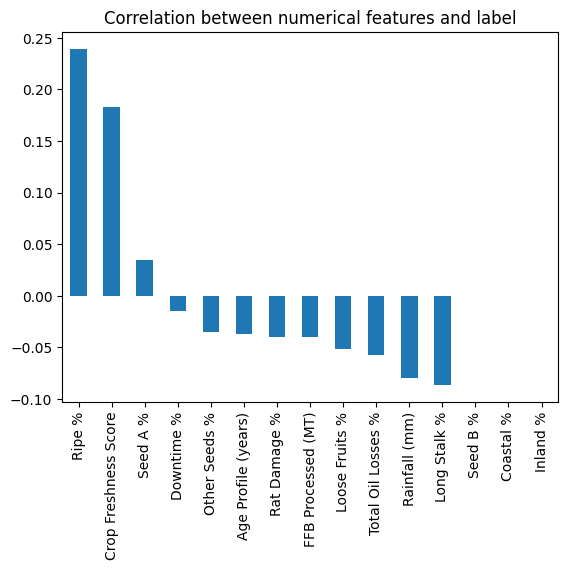

Ripe %                  0.239256
Crop Freshness Score    0.182780
Seed A %                0.034904
Downtime %             -0.014283
Other Seeds %          -0.034904
Age Profile (years)    -0.037056
Rat Damage %           -0.039949
FFB Processed (MT)     -0.040300
Loose Fruits %         -0.051422
Total Oil Losses %     -0.057220
Rainfall (mm)          -0.080028
Long Stalk %           -0.086181
Seed B %                     NaN
Coastal %                    NaN
Inland %                     NaN
dtype: float64


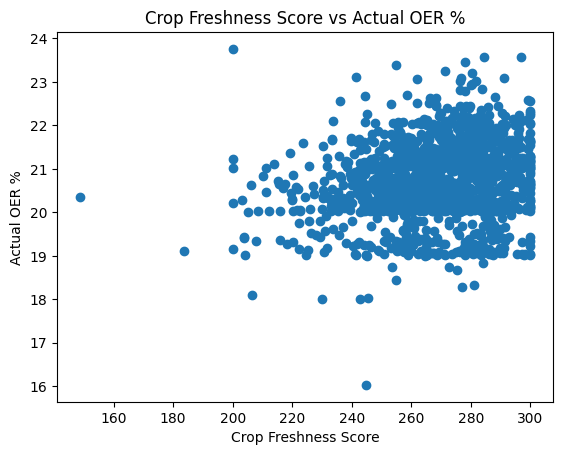

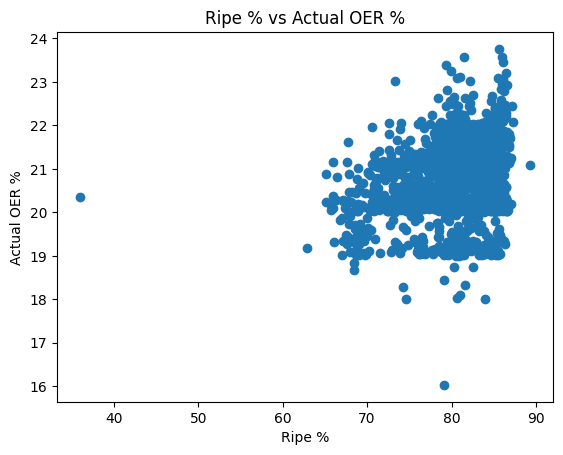

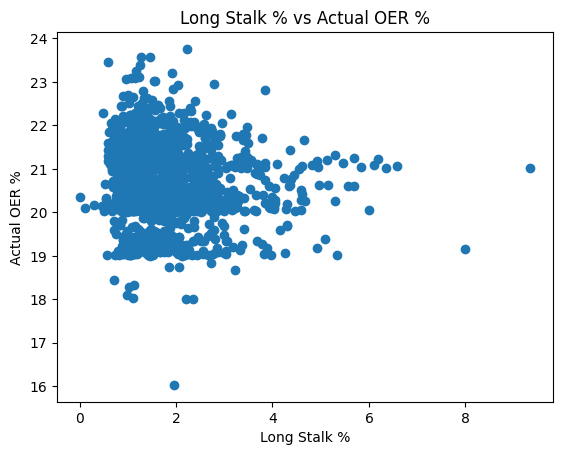

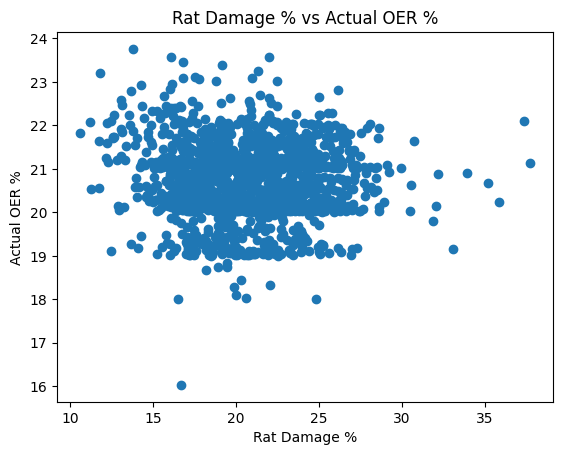

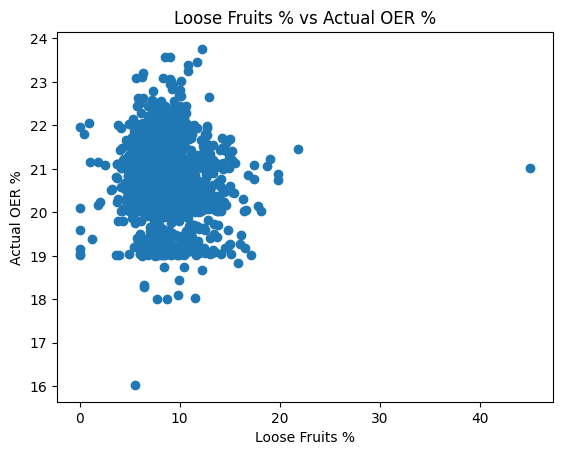

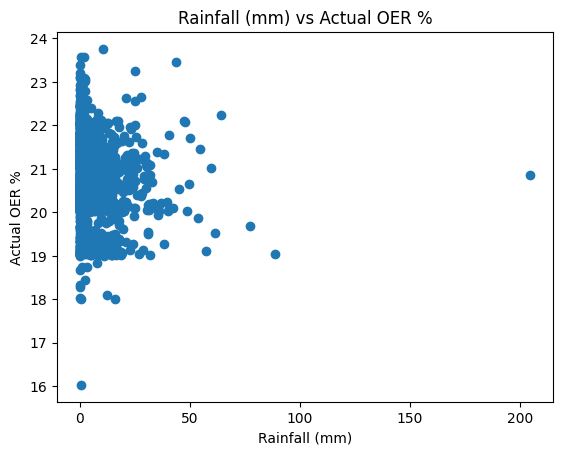

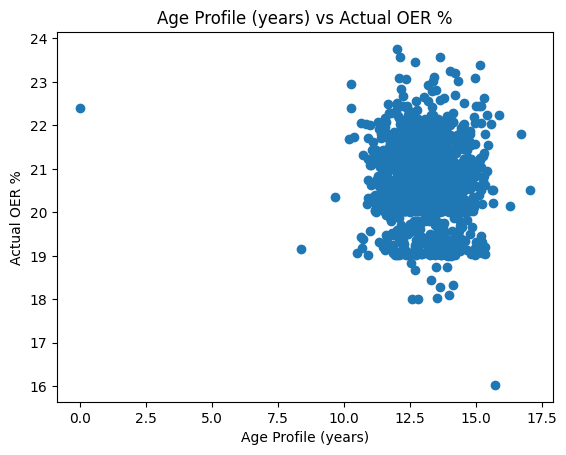

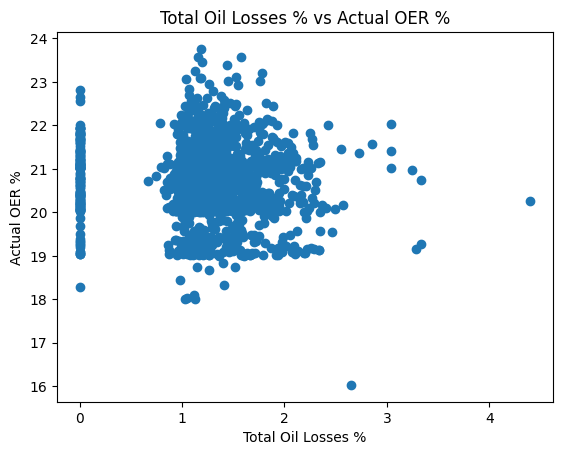

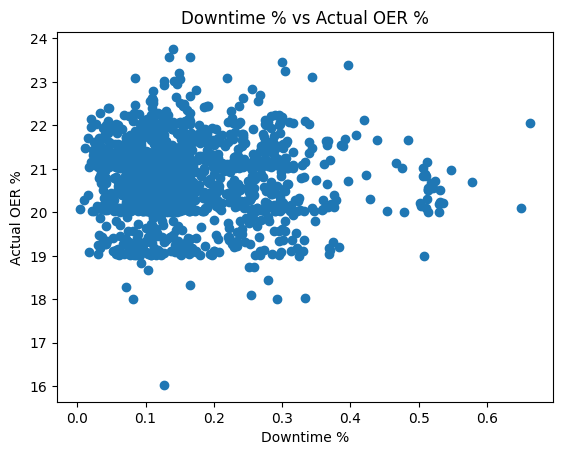

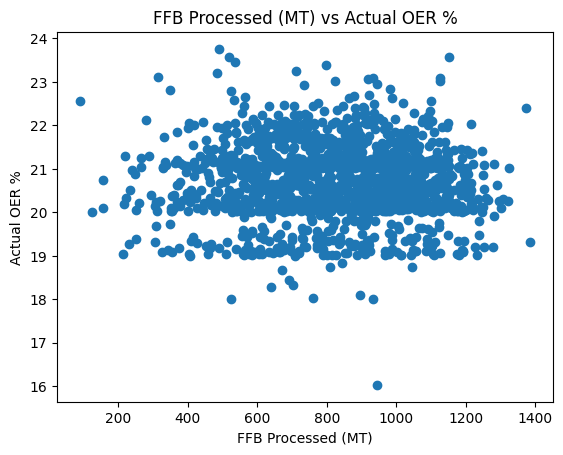

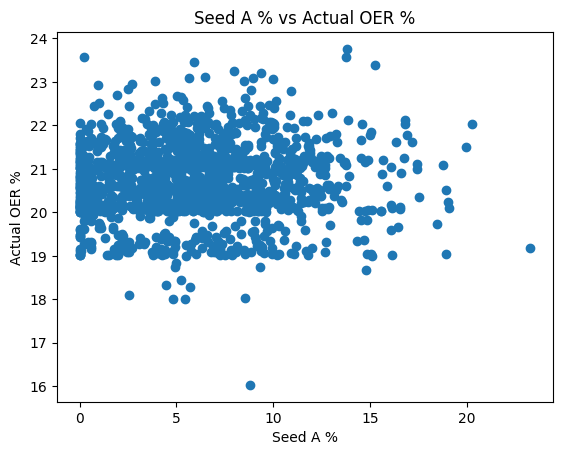

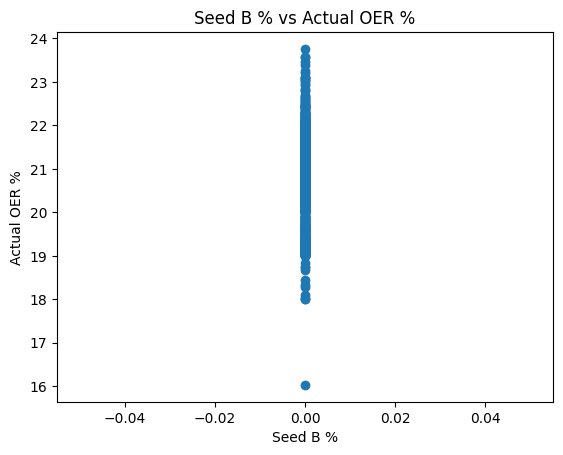

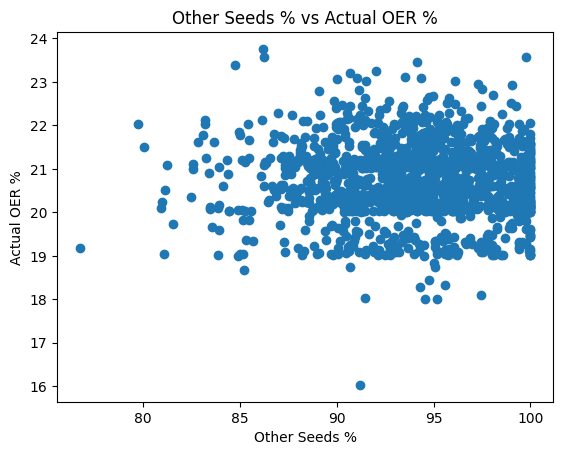

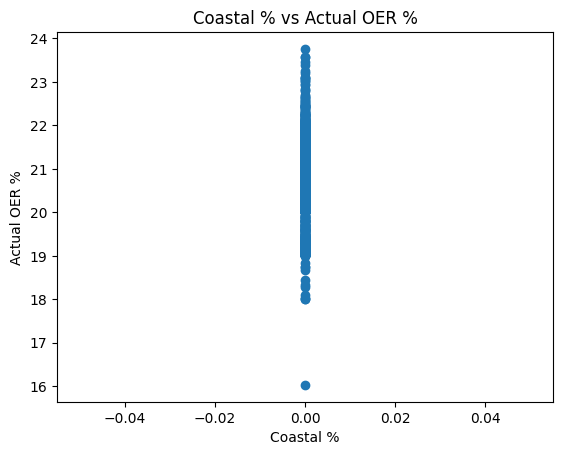

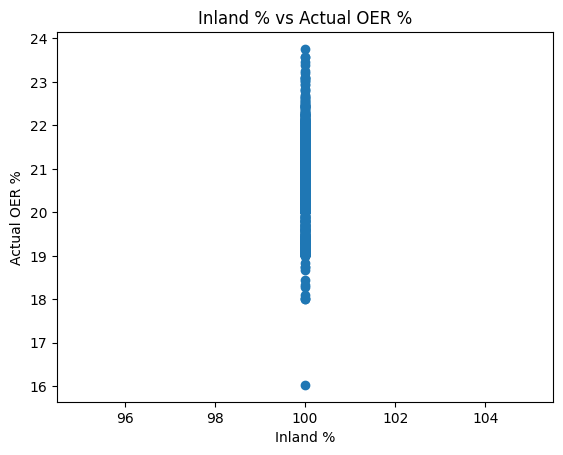

In [9]:
plot_charts(zo22)

/Users/amirashrafizham/Desktop/PythonApps/interviews/simedarbyguthrie/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning:

invalid value encountered in divide

/Users/amirashrafizham/Desktop/PythonApps/interviews/simedarbyguthrie/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning:

invalid value encountered in divide



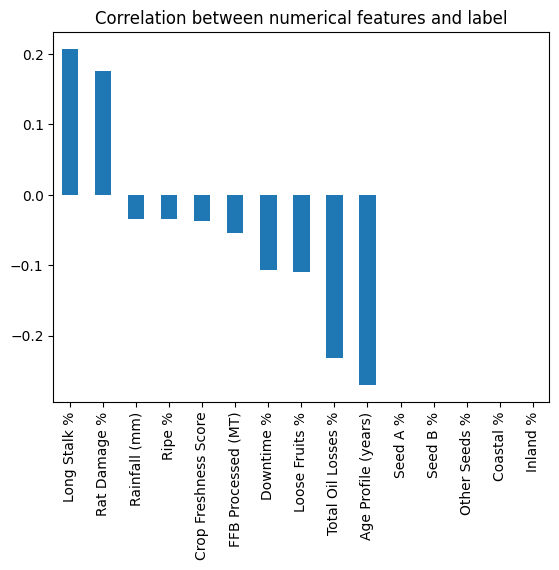

Long Stalk %            0.207450
Rat Damage %            0.175761
Rainfall (mm)          -0.033590
Ripe %                 -0.033920
Crop Freshness Score   -0.036505
FFB Processed (MT)     -0.053969
Downtime %             -0.106475
Loose Fruits %         -0.109725
Total Oil Losses %     -0.231376
Age Profile (years)    -0.269932
Seed A %                     NaN
Seed B %                     NaN
Other Seeds %                NaN
Coastal %                    NaN
Inland %                     NaN
dtype: float64


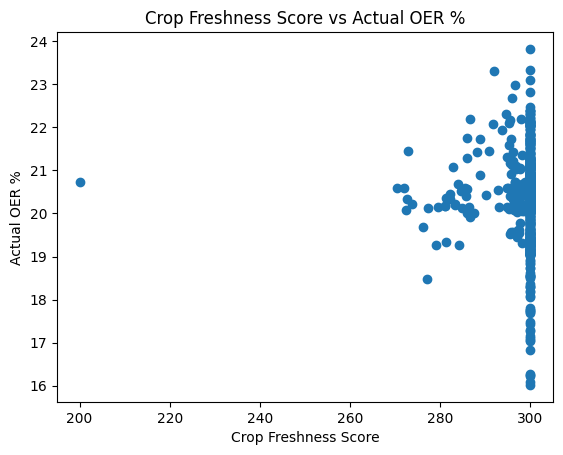

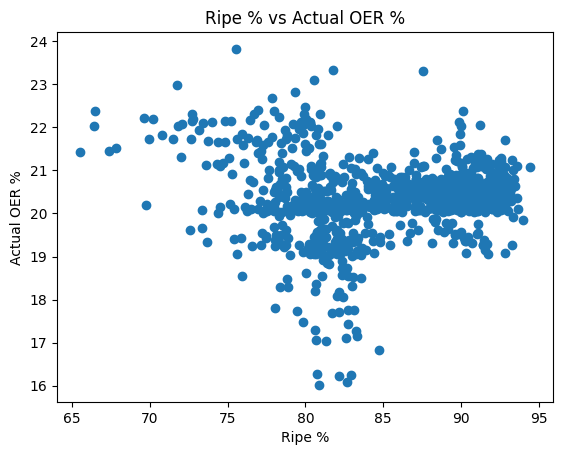

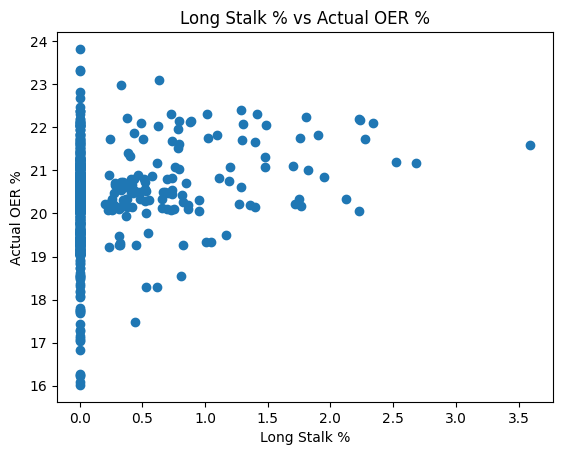

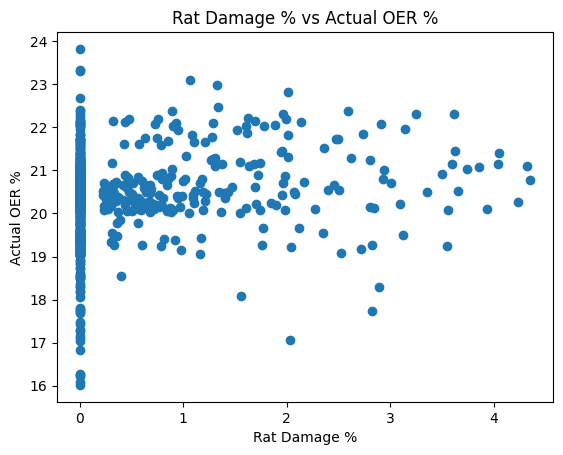

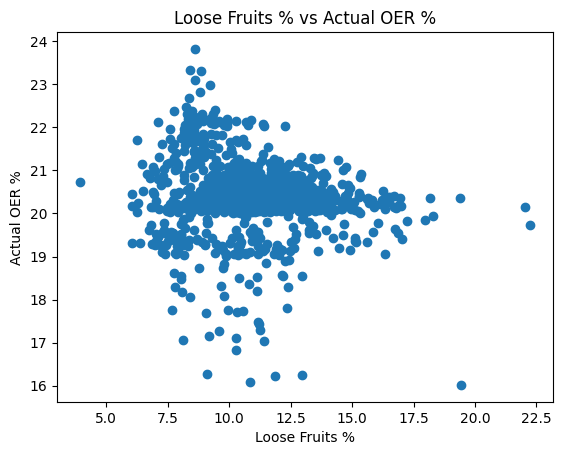

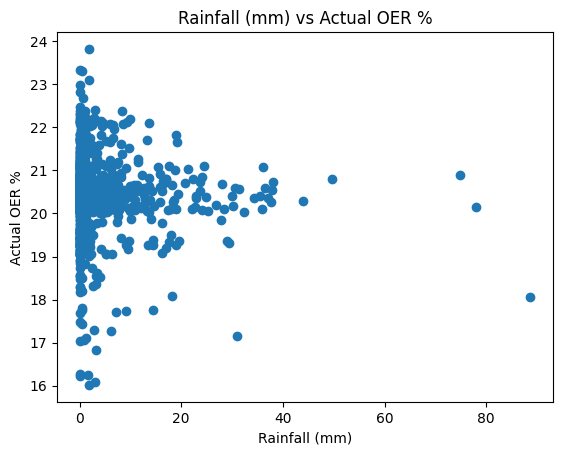

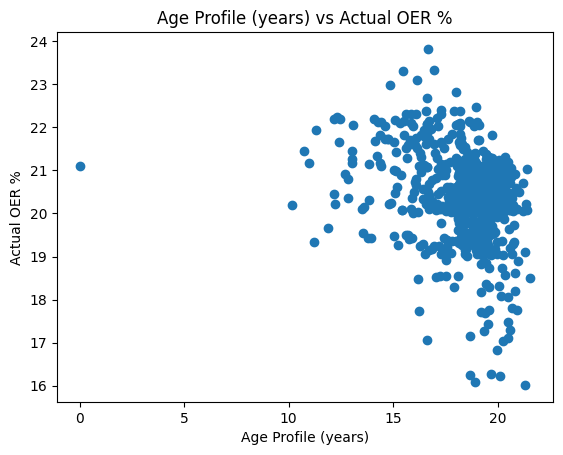

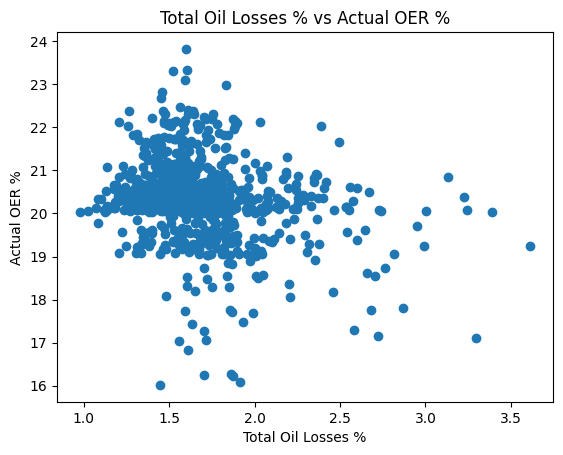

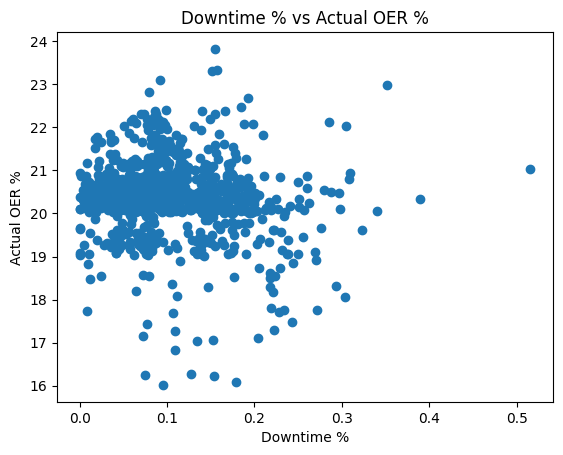

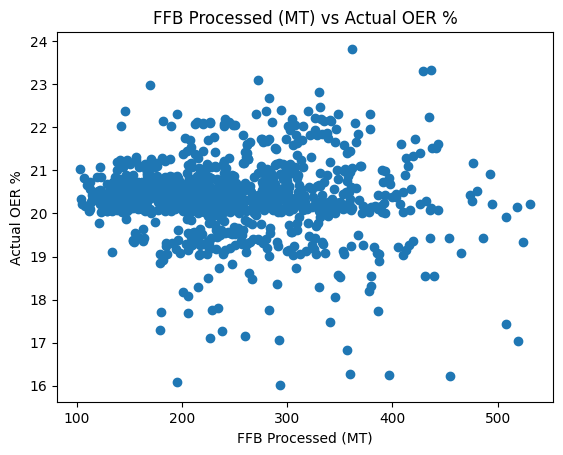

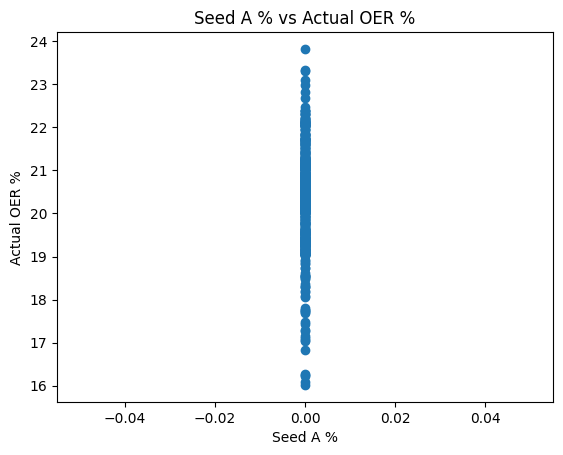

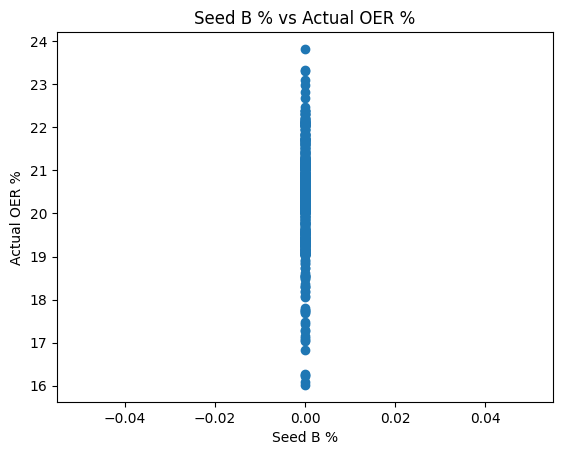

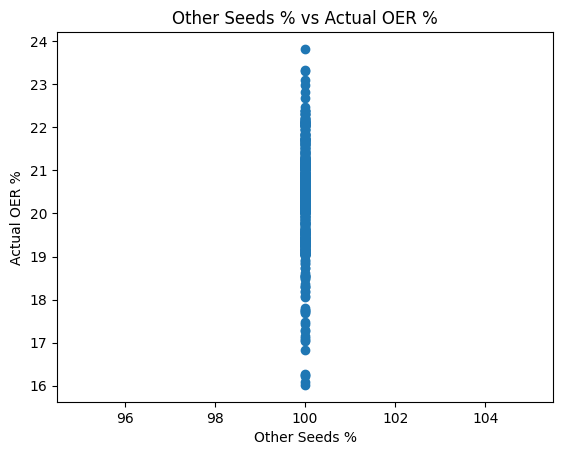

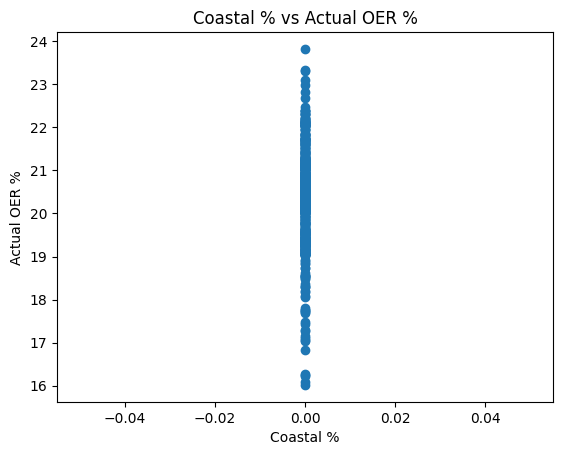

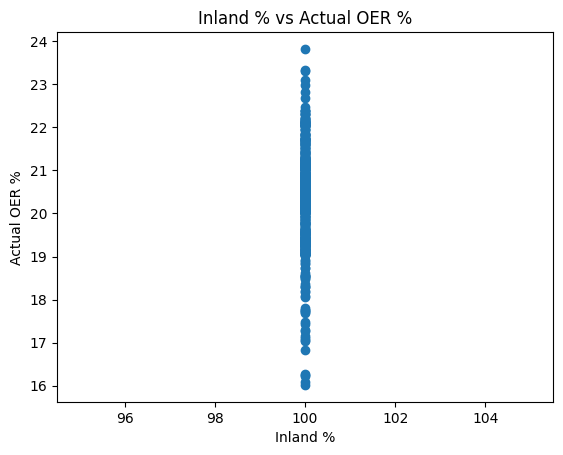

In [10]:
plot_charts(zo17)

In [11]:
# loop through the numerical features, plot the box plot for each numerical feature and compare the box plot for Z022 and Z017
def compare_box_plots(df1, df2, df3, df4, mill1, mill2, mill3, mill4):
    for feature in numerical_features:
        plt.boxplot([df1[feature], df2[feature], df3[feature], df4[feature]])
        plt.xlabel("Mill Code")
        plt.ylabel(feature)
        plt.title(f"{feature} for {mill1}, {mill2}, {mill3}, {mill4}")
        plt.xticks([1, 2, 3, 4], [mill1, mill2, mill3, mill4])
        plt.show()

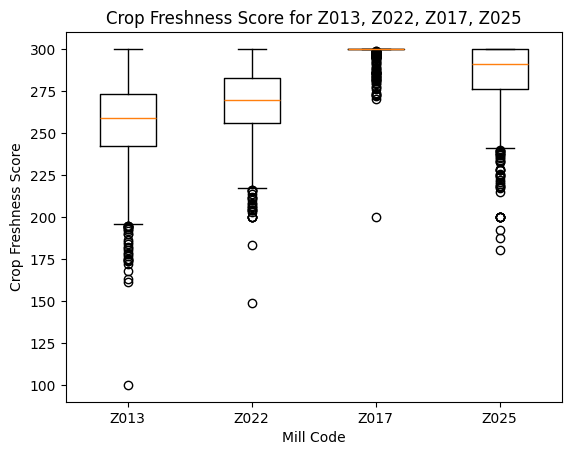

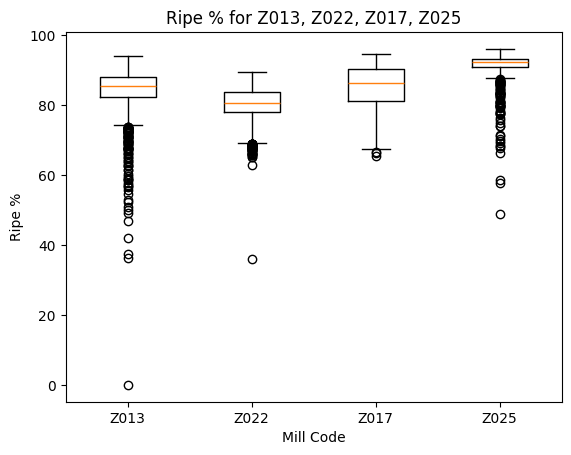

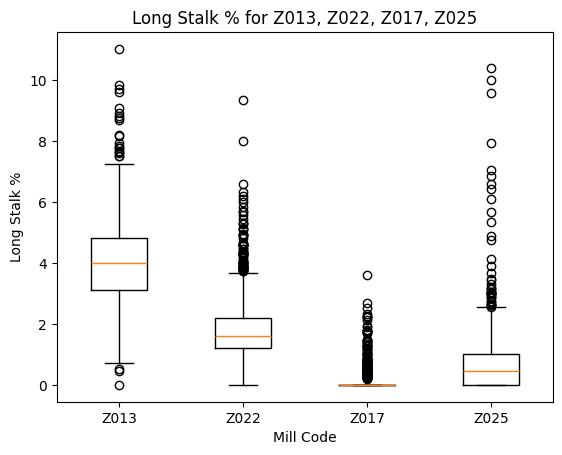

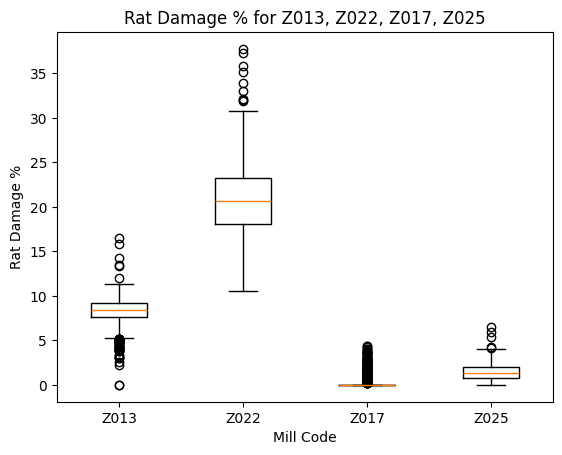

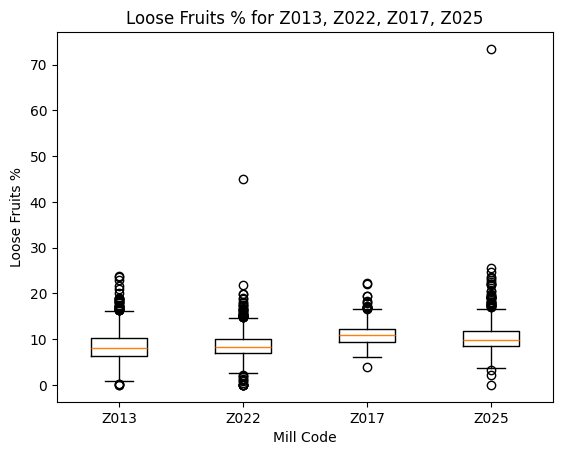

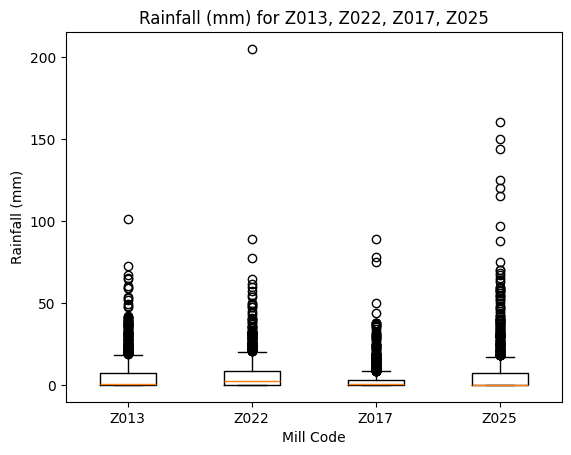

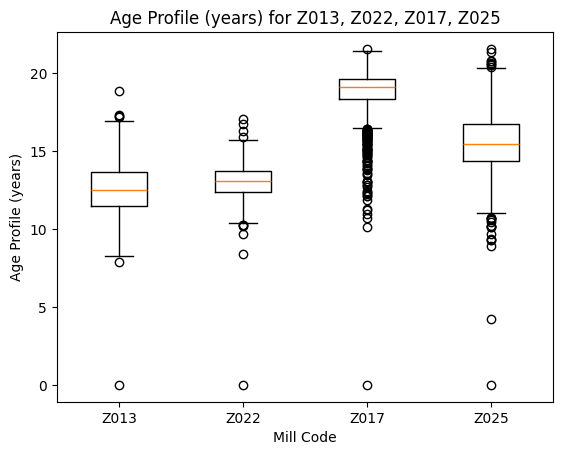

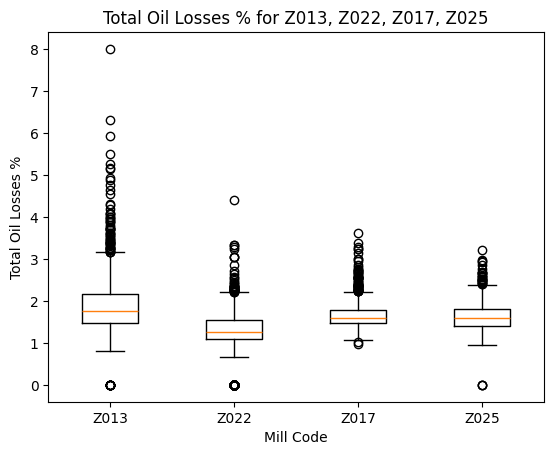

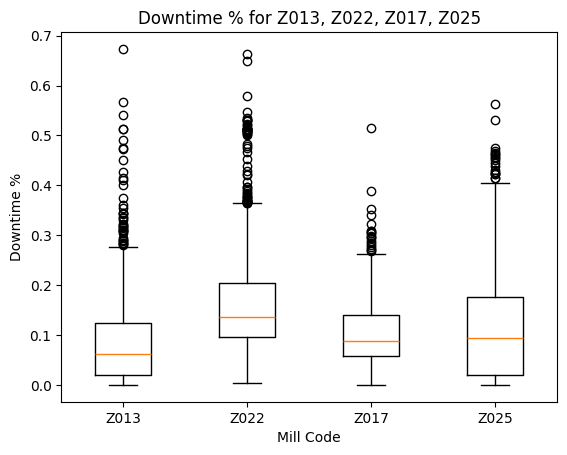

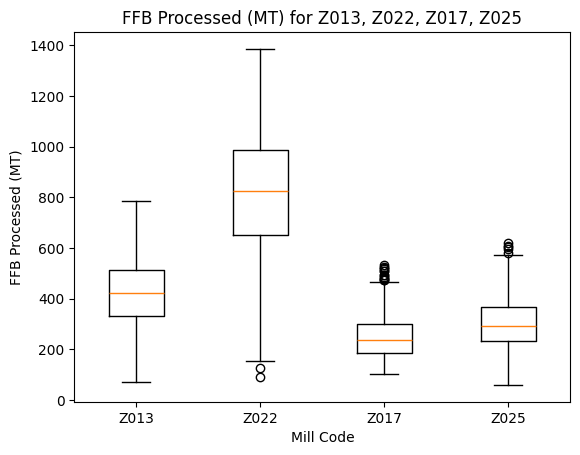

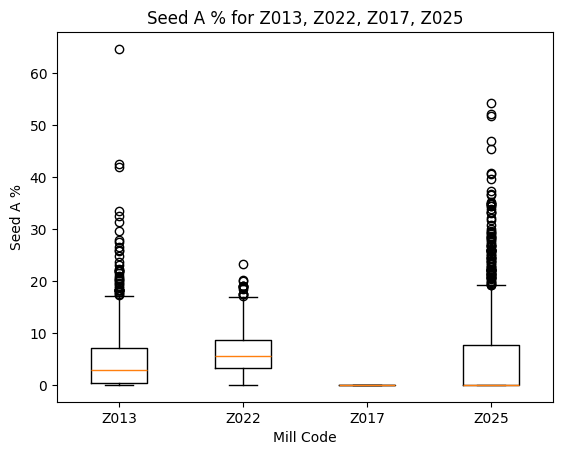

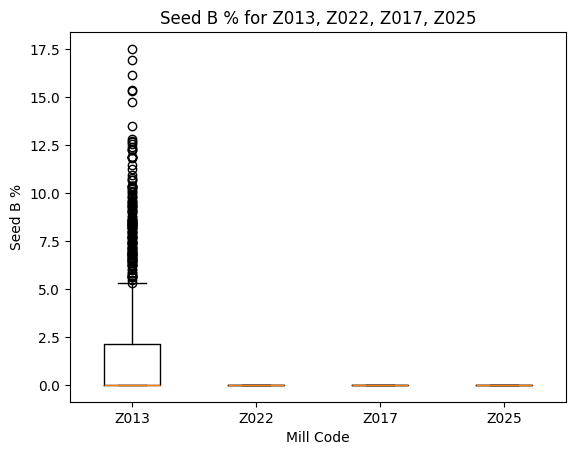

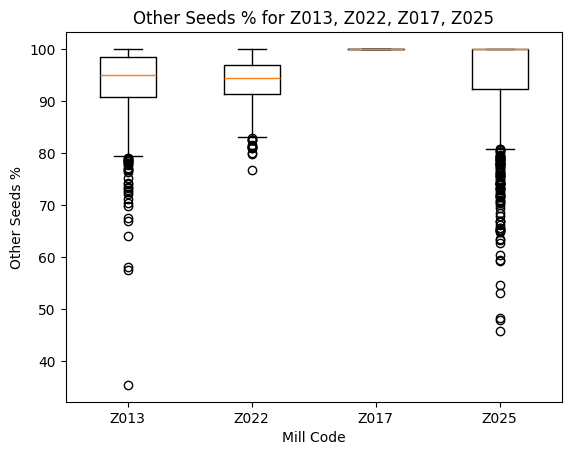

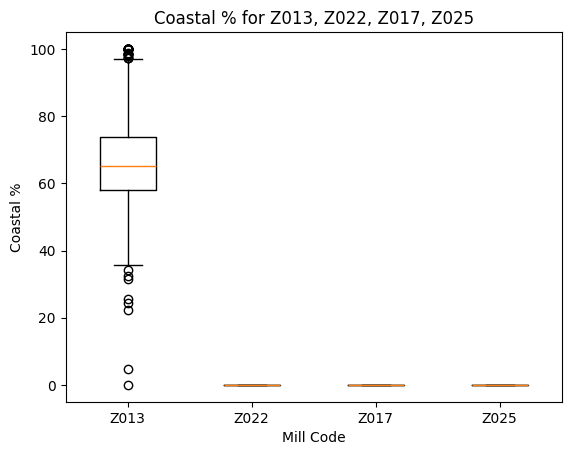

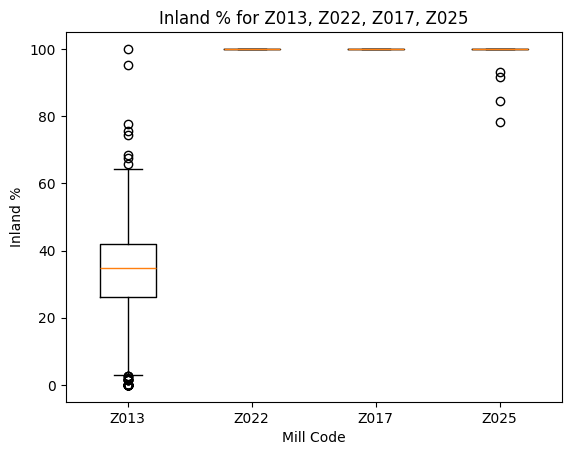

In [12]:
compare_box_plots(zo13, zo22, zo17, zo25 ,'Z013', 'Z022', 'Z017', 'Z025')

In [ ]:
# 